In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv("../data/hair_treatments.csv",index_col=0)

#### Bernoulli distributions of allcomments, c30 for each etype/month

In [3]:
month =[20160601,20160701,20160801,20160901,20161001,20161101]
etype=["Tmall","YHD"]

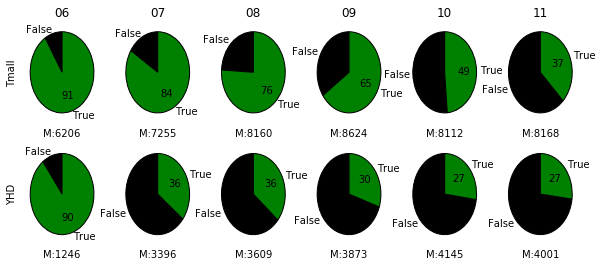

In [4]:
figsize(10,4)
colormap={True:"green",False:"black"}
for j in range(2):
    for i in range(6):
        subplot(2,6,1+i+6*j)
        piethis = df[(df.etype==etype[j])&(df.ref_date==month[i])].c30.notnull().value_counts().sort_index()
        if len(piethis)==1: piethis=pd.concat([piethis,pd.Series([0],[False])])
        pie(piethis, labels=piethis.index,startangle=90,colors=[colormap[piethis.index[0]], colormap[piethis.index[1]]],autopct="%2.0f")
        if i==0: ylabel("%s"%(etype[j]))
        if j==0: title(str(month[i])[4:6])
        xlabel("M:%i"%len(df[(df.etype==etype[j])&(df.ref_date==month[i])]))

Above: month over month, $c30$ nonnulls (green) vs $c30$ nulls

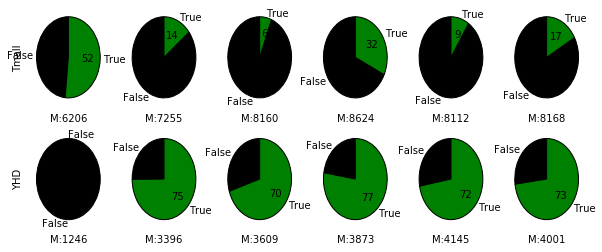

In [5]:
figsize(10,4)
colormap={True:"green",False:"black"}
for j in range(2):
    for i in range(6):
        subplot(2,6,1+i+6*j)
        piethis = df[(df.etype==etype[j])&(df.ref_date==month[i])].allcomments.notnull().value_counts().sort_index()
        if len(piethis)==1: piethis=pd.concat([piethis,pd.Series([0],[False])])
        pie(piethis, labels=piethis.index,startangle=90,colors=[colormap[piethis.index[0]], colormap[piethis.index[1]]],autopct="%2.0f")
        if i==0: ylabel("%s"%(etype[j]))
        if j==1: xlabel(str(month[i])[4:6])
        xlabel("M:%i"%len(df[(df.etype==etype[j])&(df.ref_date==month[i])]))

Above: month over month, allcomments nonnulls (green) vs allcomments nulls

In [6]:
style.use("fivethirtyeight")

Tmall
month:20160601	M:6206	#ac:3201	#c30:5654	#both:2918	max_ac:370385
month:20160701	M:7255	#ac:1041	#c30:6095	#both: 597	max_ac: 57199
month:20160801	M:8160	#ac: 490	#c30:6195	#both:  50	max_ac: 57199
month:20160901	M:8624	#ac:2761	#c30:5631	#both:2084	max_ac:520970
month:20161001	M:8112	#ac: 752	#c30:3949	#both:   0	max_ac: 57199
month:20161101	M:8168	#ac:1381	#c30:3052	#both:  40	max_ac: 29724

YHD
month:20160601	M:1246	#ac:   0	#c30:1118	#both:   0	max_ac:     0
month:20160701	M:3396	#ac:2543	#c30:1207	#both:1097	max_ac: 95530
month:20160801	M:3609	#ac:2530	#c30:1301	#both:1129	max_ac: 51647
month:20160901	M:3873	#ac:3001	#c30:1167	#both:1163	max_ac: 99710
month:20161001	M:4145	#ac:2992	#c30:1128	#both:1120	max_ac:100819
month:20161101	M:4001	#ac:2919	#c30:1079	#both:1069	max_ac:102150



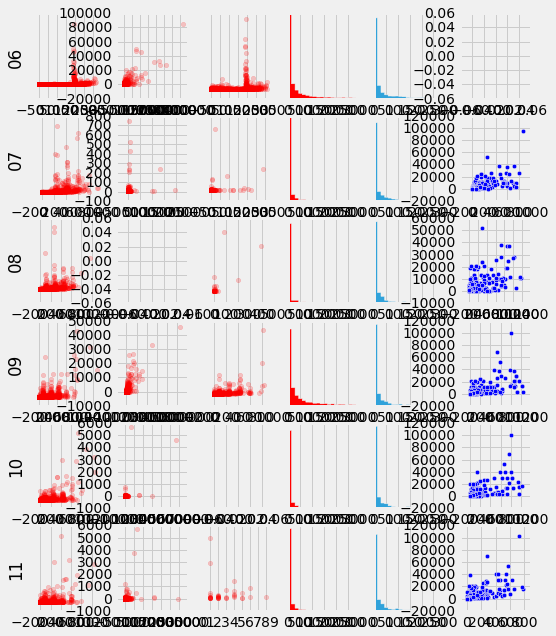

In [8]:
figsize(8,10)
output1, output2= "",""
for i in range(6):
    ##Tmall
    subplot(6,6,1+6*i)
    tmp = df[(df.etype==etype[0])&(df.ref_date==month[i])]
    scatter(tmp.c30, tmp.monthsale, color="r",alpha=.2)
    ylabel(str(month[i])[4:6]); yticks([])
    subplot(6,6,2+6*i)
    #hist(tmp.monthsale,range=(0,300), bins=20, histtype="stepfilled", color="red"); yticks([])
    scatter(tmp.allcomments, tmp.monthsale,color="r",alpha=.2)
    subplot(6,6,3+6*i)
    #hist(tmp.c30,range=(0,300), bins=20, histtype="stepfilled",color="red"); yticks([])
    scatter(tmp.c30,tmp.allcomments,color="r",alpha=.2); yticks([])
    subplot(6,6,4+6*i)
    hist(tmp.allcomments, range=(0,3000), bins=20, histtype="stepfilled", color="red"); yticks([])

    output1+= "month:%i\tM:%4i\t#ac:%4i\t#c30:%4i\t#both:%4i\tmax_ac:%6i\n"%(month[i],
                                                 len(tmp),
                                                 tmp.allcomments.notnull().sum(),
                                                 tmp.c30.notnull().sum(),
                                                 len(tmp[(tmp.c30.notnull())&(tmp.allcomments.notnull())]),
                                                 int(max(tmp.allcomments.fillna(0))))
    
    ## YHD
    subplot(6,6,5+6*i)
    tmp = df[(df.etype==etype[1])&(df.ref_date==month[i])]
    hist(tmp.c30, range=(0,300), bins=20, histtype="stepfilled"); yticks([])
    subplot(6,6,6+6*i)
    #hist(tmp.allcomments.fillna(0), range=(0,300), bins=20, histtype="stepfilled"); yticks([])
    scatter(tmp.c30, tmp.allcomments)
    output2+= "month:%i\tM:%4i\t#ac:%4i\t#c30:%4i\t#both:%4i\tmax_ac:%6i\n"%(month[i],
                                                 len(tmp),
                                                 tmp.allcomments.notnull().sum(),
                                                 tmp.c30.notnull().sum(),
                                                 len(tmp[(tmp.c30.notnull())&(tmp.allcomments.notnull())]),
                                                 int(max(tmp.allcomments.fillna(0))))
print "Tmall\n================\n",output1
print "YHD\n================\n",output2
    